# Training a sentiment analysis classifier based on supervised machine learning algorithms

In [1]:
import string

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
stop_words = set(stopwords.words('spanish'))

In [4]:
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

### Loading labeled tweets

In [5]:
# Dataset loaded from: https://docs.google.com/spreadsheets/d/11_E2ngsEOyTQwbwVVRHY5urzFF95BQCV/edit#gid=1788161364
#tweets_df = pd.read_csv('./data/dataset/dataset_30.csv', sep = ',')
#tweets_df = pd.read_csv('./data/dataset/dataset_60.csv', sep = ',')
tweets_df = pd.read_csv('./data/dataset/dataset_100.csv', sep = ',')

In [6]:
tweets_df.shape

(648, 4)

In [7]:
tweets_df.head()

,Unnamed: 0,full_text,sentiment,emotion
0,182,"No nos estamos cuenta que el tal paro armado del Golfo es patrocinado y en mancuerna con el @PactoHistorico y nos están AVISANDO lo que le espera a Colombia si el GUERRILLERO ASESINO EXTORSIONADOR SECUESTRADOR Y CORRUPTO IFUEPUTA NO gana las Elecciones,DIOS protejenos..",negative,fear
1,194,"@BluRadioCo #LaEleccionEsColombia Paso en los EEUU, Reino Unido,Francia, Italia, España, Argentina, Chile, Perú...Quien garantiza que en Colombia no se robarán las elecciones? Los Colombianos no elegimos Presidentes, son puestos por poderosos Masones a quienes se les llama Estado Profundo. https://t.co/8pRRJUUf4K",negative,fear
2,488,@MariaFdaCabal y para distraer de las elecciones dónde Colombia eligió ya Presidente 2022-2026 @FicoGutierrez https://t.co/3fcppGX1EY,NaN,NaN
3,366,Me salió esto 😅\r\n \r\n \r\n \r\n https://t.co/TJokUajStC,NaN,NaN
4,492,@lafm @lcvelez @darcyquinnr \r\n \r\n Con esta mafia en la @Registraduria y el riesgo que me ROBEN.\r\n \r\n Exijo el derecho a tomar foto o hacer video de mi votación el día de las elecciones.\r\n \r\n @ProcuraduraCol1 @FiscaliaCol @CNE_COLOMBIA,NaN,NaN


In [8]:
tweets_df['sentiment'].value_counts(dropna = False, normalize = True)

negative    0.404321
NaN         0.390432
neutral     0.174383
positive    0.030864
Name: sentiment, dtype: float64

### Leaving out unlabeled texts, this data is not useful for training or validating a supervised model

In [9]:
# Removing  unlabeled tweets
tweets_labeled_df = tweets_df.loc[tweets_df['sentiment'].notnull()]

In [10]:
tweets_labeled_df.shape

(395, 4)

In [11]:
tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment']!='neutral']

In [12]:
tweets_labeled_df.shape

(282, 4)

In [13]:
# Scenario 1: Working with all classes

# Scenario 2: Working only with positive and negative classes
# Removing neutral class
#tweets_labeled_df = tweets_labeled_df.loc[tweets_labeled_df['sentiment'].isin(['positive', 'negative'])]

# Scenario 3: Treating neutral as positive classes
#tweets_labeled_df['sentiment'] = tweets_labeled_df['sentiment'].replace({'neutral': 'positive'})

### Splitting train and test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tweets_labeled_df['full_text'], tweets_labeled_df['sentiment'], test_size = 0.2, stratify = tweets_labeled_df['sentiment'], random_state = 1)


In [15]:
X_train.shape

(225,)

In [16]:
pd.Series(y_train).value_counts(normalize = True)

negative    0.928889
positive    0.071111
Name: sentiment, dtype: float64

In [17]:
X_test.shape

(57,)

In [18]:
pd.Series(y_test).value_counts(normalize = True)

negative    0.929825
positive    0.070175
Name: sentiment, dtype: float64

### Vectorizing texts

<table>
    <tbody>
        <tr>
            <td>
                <h4>Bag of Words</h4>
                <img src="./imgs/bow.png" style="width: 500px;">
            </td>
        </tr>
    </tbody>
</table>

In [19]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words)

In [20]:
X_bow = bow.fit_transform(X_train)

### Training and evaluating a model using BOW

In [21]:
#model = DecisionTreeClassifier(max_depth=9)

In [22]:
#model = RandomForestClassifier(max_depth=9,n_estimators=300)

In [23]:
#model = SVC(kernel='rbf', degree=3, gamma='scale')

In [24]:
#model = KNeighborsClassifier(n_neighbors=5)

In [25]:
#model = MultinomialNB()

In [26]:
model = MLPClassifier(hidden_layer_sizes=(200, 200, 200))

In [27]:
model.fit(X_bow, y_train)

MLPClassifier(hidden_layer_sizes=(200, 200, 200))

In [28]:
y_train_bow_predict = model.predict(X_bow)
y_test_bow_predict = model.predict(bow.transform(X_test))

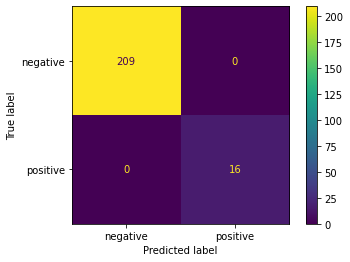

In [29]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

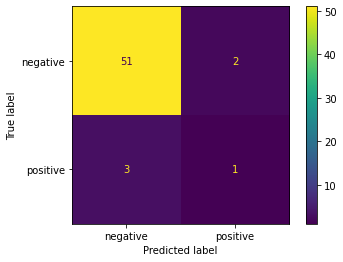

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [31]:
# Metrics calculation for binary classes
print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positive'))
print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positive'))

Precision: 0.3333333333333333
Recall: 0.25
F1: 0.28571428571428575


In [32]:
# Metrics calculation for more than two classes
print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: [0.94444444 0.33333333]
Recall: [0.96226415 0.25      ]
F1: [0.95327103 0.28571429]


### How interpret the results?

<table>
    <tbody>
        <tr>
            <td>
                <img src="./imgs/confusion-matrix.png" style="height: 400px;">
            </td>
            <td>
                <img src="./imgs/precision-recall.png" style="height: 600px;">
            </td>
        </tr>
    </tbody>
</table>

### Analyzing errors

In [33]:
error_df = pd.concat(
    [ pd.concat([X_test, y_test ], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict) ]
, axis = 1).rename(columns = { 'sentiment': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [34]:
error_df.shape

(57, 3)

In [35]:
len(error_df.loc[error_df['actual'] != error_df['predicted']].head(100))

5